Unbalanced Matching Markets The Stark Effect of Competition(I. Ashlagi, Y. Kanoria, and J. D. Leshno (2015))の再現

<!-- 忘れている方も多いと思うのでまずは簡単に夏の分を見てみる. -->
<!-- + PLOTS.JL -->
<!-- 今回の付け足し... 4.2 Size of the core under correlated preferences -->
<!-- 0が最後に来るという仮定を抜いたときの人数不均衡下でのコアの大きさの変化 -->
<!-- シミュレーションのコード改善して高速化 -->
<!-- 4.3 Robustness of the short side advantage -->

# Unbalanced Matching Markets

## Section 1: Introduction

### この論文の内容

男女間のマッチングについて

1, マッチングマーケットはコアが小さくなる可能性が高い.

2, 人数の小さいサイドがより望みの相手とマッチでき, そのアドバンテージはモデルの小さな変化でも変わらない.

### 定義

- 男性の集合$\mathcal{M} = \{1,\ldots,n\}$

- 女性の集合$\mathcal{W} = \{1, \ldots  , n + k\}$

- MOSM(the men-optimal stable matching): 男性がプロポーズするDAアルゴリズムによって作られ, どの男性も最も好みのstable womanとマッチする. 

- WOSM(the women-optimal stable matching): MOSMとは逆, 女性がプロポーズするDAアルゴリズムや, この論文のアルゴリズム2によって作られる.

- 男性mの選好表の女性$w$のランクを$\mathrm{Rank}_m(w) =  |\{w' : w' \succeq_m w\}|$と表す.

- 女性も同様に$\mathrm{Rank}_w(m)$と表す.

- マッチングとは定義域が$\mathcal{M}\cup \mathcal{W}$である自分自身への写像$\mu$で, 

    - 1. for every $m \in \mathcal{M}, \mu(m) \in \mathcal{W} \cup \{m\}$, and for every $w \in \mathcal{W}, \mu(w) \in \mathcal{M}\{w\}$

    - 1. for every $m, w \in \mathcal{M}\cup\mathcal{W}, \mu(m) = w \ \ \ \mathrm{implies} \ \ \ \mu(w) = m$

- $\mu$がunstableとは,ある男性$m$ と女性 $w$が存在し, $w\succ_m\mu(m)$ and $m \succ_w \mu(w)$.
- $m$が$w$のstable partner (逆も) とは, あるstable matchingが存在し, そこで$m$が$w$とマッチしていること.

- 男女間のマッチングのコアとは, stable matchingsの集合.

- ランダムマッチングマーケットは"complete preference list"をそれぞれの男女に独立にランダムに選ぶことで作られる. 

- コアのサイズを図る方法として以下の２つを用いる.

    - 複数のstable partners を持つ人の割合

        ここで使うのは, (すべてのstable matchingsにおいてパートナーが二人以上いる男性の数)/男性の数

    - MOSMとWOSMのもとでのmen’s average rank of wivesの差
        
        任意のマッチング$\mu$に対し,$\mathrm{R}_{\mathrm{MEN}}(\mathrm{MOSM}) \leq \mathrm{R}_{\mathrm{MEN}}(\mu) \leq \mathrm{R}_{\mathrm{MEN}}(\mathrm{WOSM})$であることによる

        - men's average rank of wives

            $$
\mathrm{R}_{\mathrm{MEN}}(\mu) = \frac{1}{|\mathcal{M} \setminus \mathcal{\bar M}|} \sum_{m\in \mathcal{M}\setminus \mathcal{\bar M} } \mathrm{Rank}_m(\mu(m)) 
$$

            - ただし$\mathcal{\bar M}$ は$\mu$のもとでマッチしていない男性の集合

        - women's average rank of husbands

            $$
\mathrm{R}_{\mathrm{WOMEN}}(\mu) = \frac{1}{|\mathcal{W} \setminus \mathcal{\bar W}|} \sum_{w\in \mathcal{W}\setminus \mathcal{\bar W} } \mathrm{Rank}_w(\mu(w)) 
$$

            - ただし$\mathcal{\bar W}$ は$\mu$のもとでマッチしていない女性の集合
- RSD: Random Serial Dictatorship. 男性がランダムに順にまだ選ばれていない女性を選んでいくマッチング.

### 仮定

- どの男性$m$も"complete strict preference list" を女性の集合に対して持つと仮定する. 女性も同様. 
ただし, complete strict preference listは 皆がunmatchedよりもmatchedの状態を必ず好むということ.
つまり, 選好表の最後の行のみに0が来る.

### Previous Results

Theorem [Pittel (1989b)].

男性n人, 女性n人のマッチングマーケットでは, 複数のstable partners を持つ人の割合は$n \rightarrow \infty$で$1$に確率収束する. さらに,

$$
\frac{R_{MEN} (\mathrm{MOSM})}{\log n} \rightarrow_p 1
$$
$$
\frac{R_{MEN} (\mathrm{WOSM})}{n / \log n} \rightarrow_p 1
$$

In [1]:
using PyPlot
include("da2.jl")

INFO: Recompiling stale cache file /Users/neon/.julia/lib/v0.5/DataStructures.ji for module DataStructures.
INFO: Recompiling stale cache file /Users/neon/.julia/lib/v0.5/RCall.ji for module RCall.
INFO: Using R installation at /Library/Frameworks/R.framework/Resources
INFO: Recompiling stale cache file /Users/neon/.julia/lib/v0.5/Distributions.ji for module Distributions.


call_simple_match (generic function with 2 methods)

In [2]:
n_range = 1:1000:10000

ind1 = []
for k in n_range
    m, n = k, k
    m_prefs, f_prefs = generate_random_preference_data(m, n)
    m_matched, f_matched = call_match(m_prefs, f_prefs)
    push!(ind1, r_men(m_matched, m_prefs)/log(k))
end

In [3]:
ind2 = []
for k in n_range
    m, n = k, k
    m_prefs, f_prefs = generate_random_preference_data(m, n)
    m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
    push!(ind2, r_men(m_matched, m_prefs)/k*log(k))
end

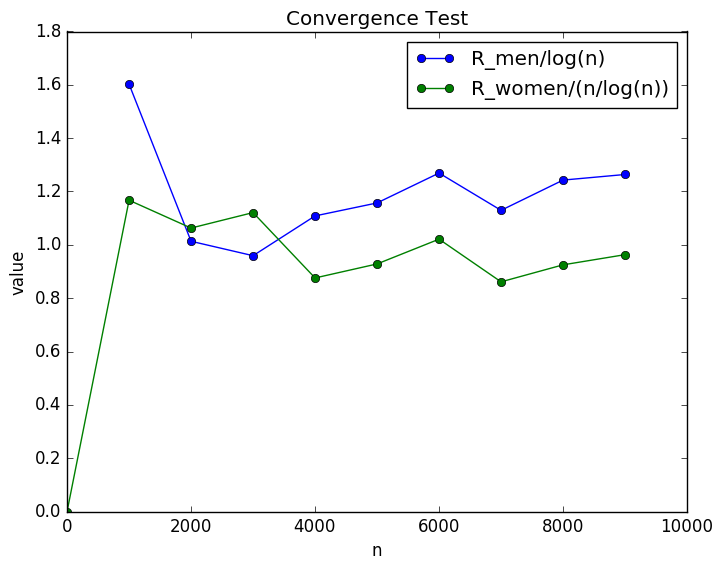

PyObject <matplotlib.legend.Legend object at 0x32203d828>

In [4]:
fig, ax = subplots()
ax[:plot](n_range, ind1, label="R_men/log(n)", "-o")
ax[:plot](n_range, ind2, label="R_women/(n/log(n))", "-o")
ax[:set_xlabel]("n")
ax[:set_ylabel]("value")
title("Convergence Test")
ax[:legend]()

**Theorem 1.**

任意の$k = k(n) \geq 1$に対し, nで添字付けられたランダムマッチングマーケットの列(ただしマッチングマーケットnは$n$人の男性, $n + k$人の女性を持つ.)を考える. 任意の $\epsilon > 0$を固定すると, 以下の起きる確率が1に収束する.

(i) 複数のstable partnersを持つ男性の割合, 女性の割合はそれぞれ$\epsilon$より小さく,

(ii) men’s average rank of wivesがすべての安定マッチングでほぼ同じになり, women’s average rank of husbandsも同様.

$$
R_{MEN} (\mathrm{WOSM})  \leq (1 + \epsilon)R_{MEN} (\mathrm{MOSM})
$$
$$
R_{WOMEN} (\mathrm{WOSM})  \geq (1 - \epsilon)R_{WOMEN} (\mathrm{MOSM})
$$


以下定理1(i)の確認

In [11]:
n = 40
loops = 10000
m_range = 20:60
pmms = Array(Float64, loops, length(m_range))
for (j, m) in enumerate(m_range)
    for l in 1:loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        pmms[l, j] = pmm_fast_revised(m_prefs, f_prefs)*100
    end
end

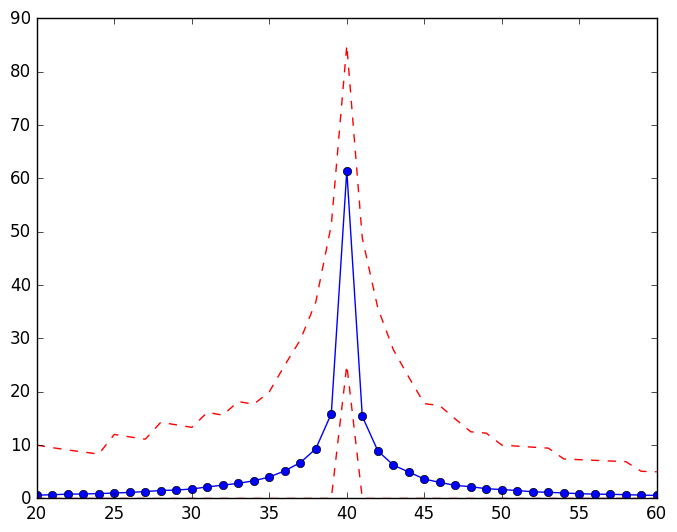

In [13]:
fig, ax = subplots()
ax[:plot](m_range, [mean(pmms[:, j]) for j in 1:length(m_range)], "-o")
ax[:plot](m_range, [quantile(pmms[:, j], 97.5/100) for j in 1:length(m_range)], "--", color="r")
ax[:plot](m_range, [quantile(pmms[:, j], 2.5/100) for j in 1:length(m_range)], "--", color="r")
ax[:legend]()

以下定理1(ii)の確認

In [14]:
n = 40
r_mens = []
m_range = 20:60
for m in m_range
    m_prefs, f_prefs = generate_random_preference_data(m, n, complete=true)
    m_matched, f_matched = call_match(m_prefs, f_prefs)
    push!(r_mens, r_men(m_matched, m_prefs))
end

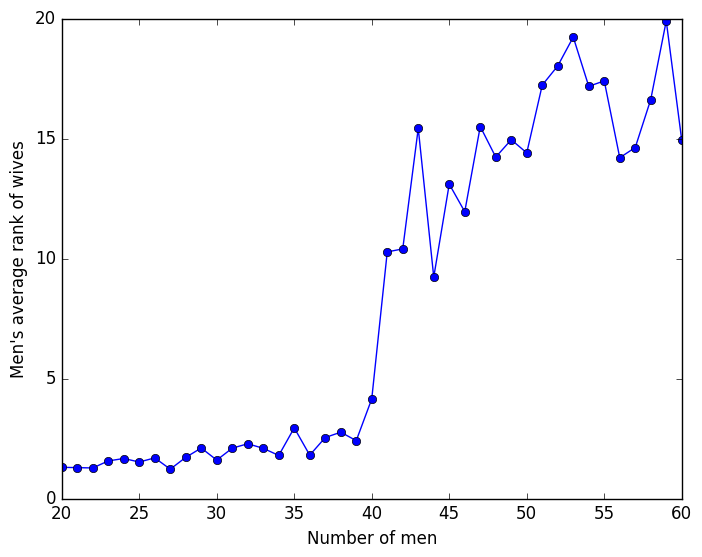

In [20]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend]()

In [53]:
n = 40
r_mens = []
r_womens = []
m_range = 20:60
num_loops = 1000
for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=true)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
        push!(rws, r_women(f_matched, f_prefs))
    end
    push!(r_mens, mean(rs))
    push!(r_womens, mean(rws))
end

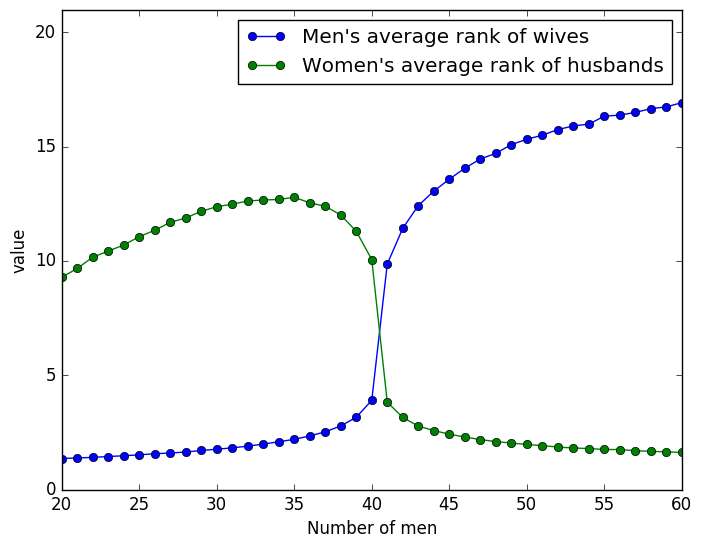

PyObject <matplotlib.legend.Legend object at 0x32c25db38>

In [54]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o", label="Men's average rank of wives")
ax[:plot](m_range, r_womens, "-o", label="Women's average rank of husbands")
ax[:set_ylim](0, 21)
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("value")
ax[:legend]()

女性の数の方が多いとき, men’s average rank of wivesは小さい, つまり, ほとんどの男性がより好む相手とマッチするのに対し, 女性はそうではないことがわかる.

In [51]:
n = 40
r_womens = []
r_womens_wosm = []
r_womens_rsd = []
m_range = 20:60
num_loops = 100
for m in m_range
    rws = []
    rws_wosm = []
    rws_rsd = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=true)
        _, f_matched = call_match(m_prefs, f_prefs)
        _, f_matched_wosm = call_match_wosm(m_prefs, f_prefs)
        _, f_matched_rsd = rsd(m, n, m_prefs)
        push!(rws, r_women(f_matched, f_prefs))
        push!(rws_wosm, r_women(f_matched_wosm, f_prefs))
        push!(rws_rsd, r_women(f_matched_rsd, f_prefs))
    end
    push!(r_womens, mean(rws))
    push!(r_womens_wosm, mean(rws_wosm))
    push!(r_womens_rsd, mean(rws_rsd))
end

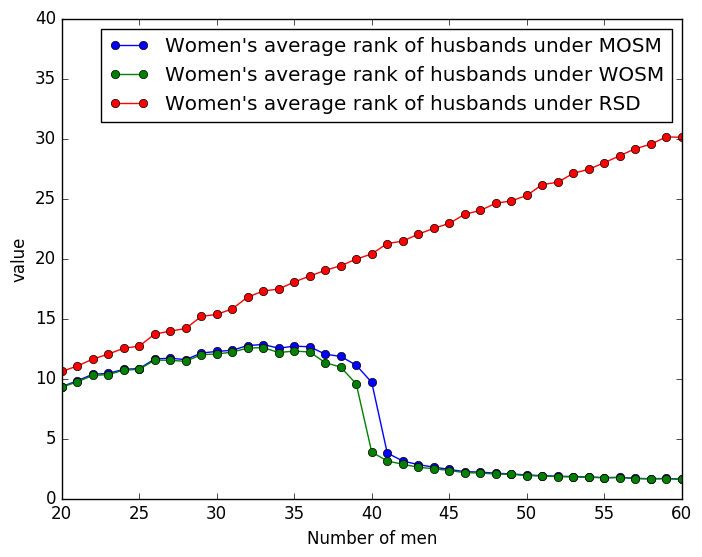

PyObject <matplotlib.legend.Legend object at 0x322b3afd0>

In [52]:
fig, ax = subplots()
ax[:plot](m_range, r_womens, "-o", label="Women's average rank of husbands under MOSM")
ax[:plot](m_range, r_womens_wosm, "-o", label="Women's average rank of husbands under WOSM")
ax[:plot](m_range, r_womens_rsd, "-o", label="Women's average rank of husbands under RSD")
ax[:set_ylim](0, 40)
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("value")
ax[:legend]()

In [59]:
n = 40
r_mens = []
r_mens_wosm = []
m_range = 20:60
num_loops = 1000
for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
    end
    push!(r_mens, mean(rs))
end

for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
        #push!(rws, r_women(f_matched, f_prefs))
    end
    push!(r_mens_wosm, mean(rs))
    #push!(r_womens, mean(rws))
end

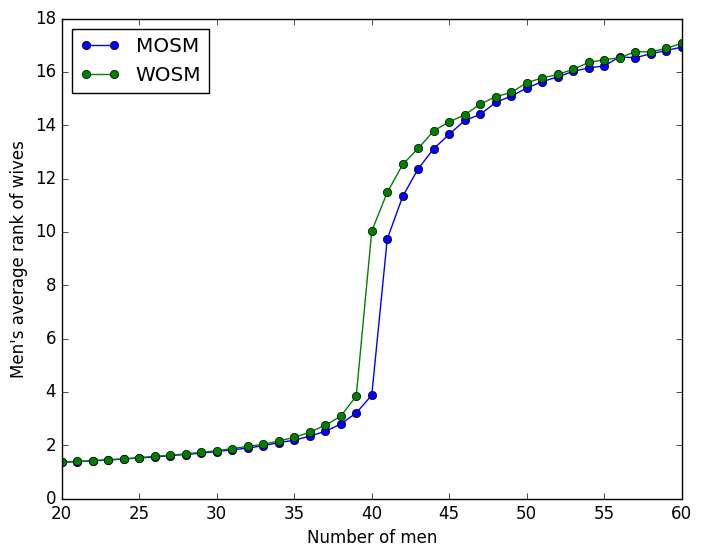

PyObject <matplotlib.legend.Legend object at 0x32c4f0518>

In [60]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o", label="MOSM")
ax[:plot](m_range, r_mens_wosm, "-o", label="WOSM")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=2)

この結果によって, 小規模なマッチングマーケットにおける男女の人数不均衡の影響がわかる. 40人の女性と20~60人の男性とのマッチングの, men's average ranks of wives をMOSM, WOSMそれぞれについて示してある. マーケットのサイズごとに1000回のシミュレーションを, 一人ひとり独立に一様ランダムcomplete preferencesを作り調べた.

小さいマーケットにおいて, コアが大きい男性40人, 女性40人のケースが特別であることがわかる.　

> どの男性$m$も"complete strict preference list" を女性の集合に対して持つと仮定する. 女性も同様. 
ただし, complete strict preference listは 皆がunmatchedよりもmatchedの状態を必ず好むということ.
つまり, 選好表の最後の行のみに0が来る.

この仮定を変えてみるとどうなるのか.

1) 男女ともに選好表の0(自分とマッチ)が一様ランダムな場所にある場合.

In [57]:
n = 40
r_mens = []
r_mens_wosm = []
m_range = 20:60
num_loops = 1000
for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
    end
    push!(r_mens, mean(rs))
end

for m in m_range
    rs = []
    rws = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false)
        m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
        push!(rs, r_men(m_matched, m_prefs))
        #push!(rws, r_women(f_matched, f_prefs))
    end
    push!(r_mens_wosm, mean(rs))
    #push!(r_womens, mean(rws))
end

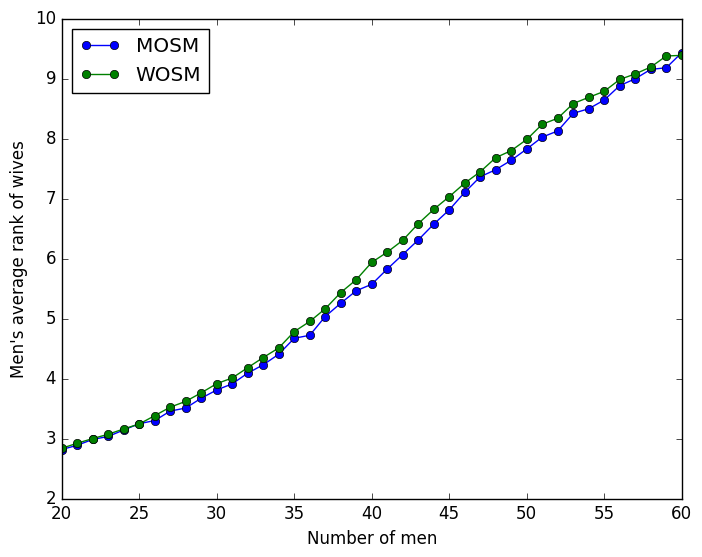

PyObject <matplotlib.legend.Legend object at 0x32371c630>

In [58]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o", label="MOSM")
ax[:plot](m_range, r_mens_wosm, "-o", label="WOSM")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=2)

2) 女性だけstage=1を持ち, 男性皆の選好表には下から数えてstage番目に0(自分とマッチしたい)がある場合(ただしstage = 0 の場合は男性の選好表の0の場所は一様ランダム)

In [33]:
n = 40
m_range = 20:60
num_loops = 100
stage_range = 1:4:29
stage_range = insert!(collect(stage_range), 1, 0)
r_mens = Array(Float64, num_loops, length(m_range), length(stage_range))
for (j, m) in enumerate(m_range)
    for (k, stage) in enumerate(stage_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false, m_stage=stage, f_stage=1)
            m_matched, f_matched = call_match(m_prefs, f_prefs)
            r_mens[l, j, k] = r_men(m_matched, m_prefs)
        end
    end
end

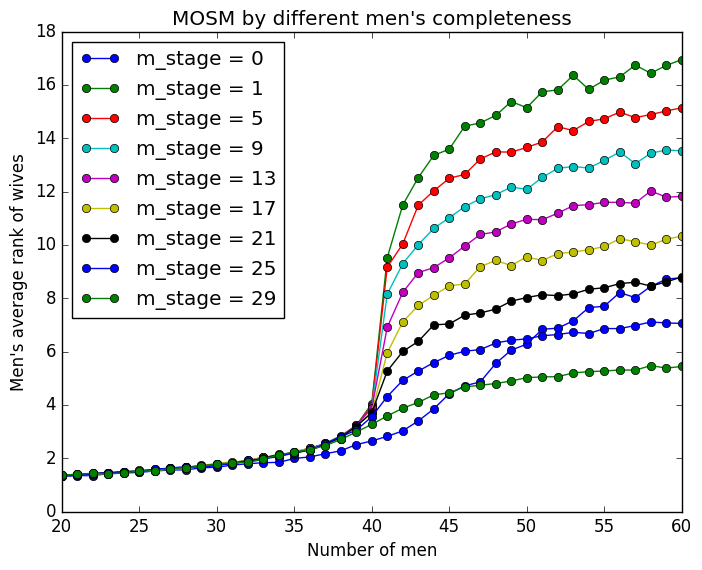

PyObject <matplotlib.legend.Legend object at 0x322f600b8>

In [34]:
fig, ax = subplots()
for (k, stage) in enumerate(stage_range)
    ax[:plot](m_range, [mean(r_mens[:, j, k]) for j in 1:length(m_range)], "-o", label="m_stage = $stage")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
#ax[:set_ylim]()
title("MOSM by different men's completeness")
ax[:legend](loc=2)

2\*) 女性だけ0が最後となるpreference listをもち, 男性皆の選好表には上から数えてplace番目に0(自分とマッチしたい)がある場合(ただしplace = 0 の場合は男性の選好表の0の場所は一様ランダム)

In [22]:
n = 40
m_range = 20:60
num_loops = 100
place_range = 1:4:29
place_range = insert!(collect(place_range), 1, 0)
r_mens = Array(Float64, num_loops, length(m_range), length(place_range))
for (j, m) in enumerate(m_range)
    for (k, place) in enumerate(place_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=place, f_place=m+1)
            m_matched, f_matched = call_match(m_prefs, f_prefs)
            r_mens[l, j, k] = r_men(m_matched, m_prefs)
        end
    end
end

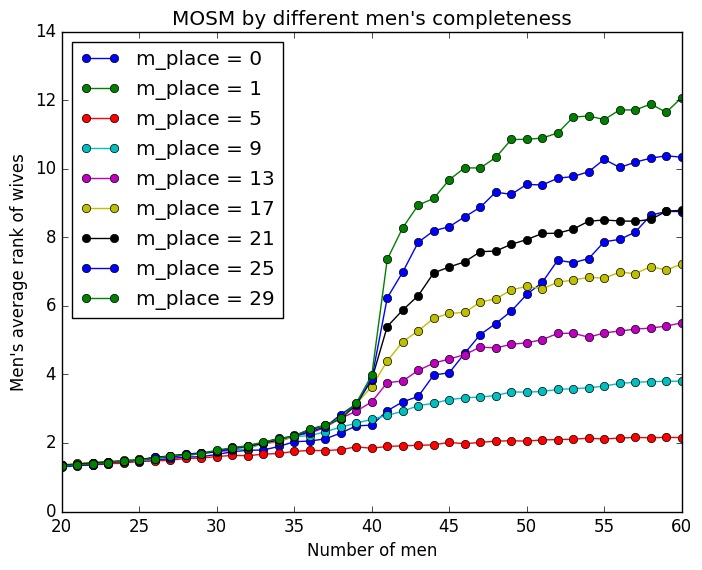

PyObject <matplotlib.legend.Legend object at 0x325dde358>

In [23]:
fig, ax = subplots()
for (k, place) in enumerate(place_range)
    ax[:plot](m_range, [mean(r_mens[:, j, k]) for j in 1:length(m_range)], "-o", label="m_place = $place")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
#ax[:set_ylim]()
title("MOSM by different men's completeness")
ax[:legend](loc=2)

それぞれのm_placeについて, MOSMとWOSMのもとでのMen's average rank of wivesの差をプロットすると,

In [54]:
n = 40
m_range = 20:60
num_loops = 100
place_range = 1:4:29
place_range = insert!(collect(place_range), 1, 0)
r_mens_diff = Array(Float64, num_loops, length(m_range), length(place_range))
for (j, m) in enumerate(m_range)
    for (k, place) in enumerate(place_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=place, f_place=m+1)
            m_matched, _ = call_match(m_prefs, f_prefs)
            m_matched_wosm, _ = call_match_wosm(m_prefs, f_prefs)
            r_mens_diff[l, j, k] = r_men(m_matched_wosm, m_prefs) - r_men(m_matched, m_prefs)
        end
    end
end

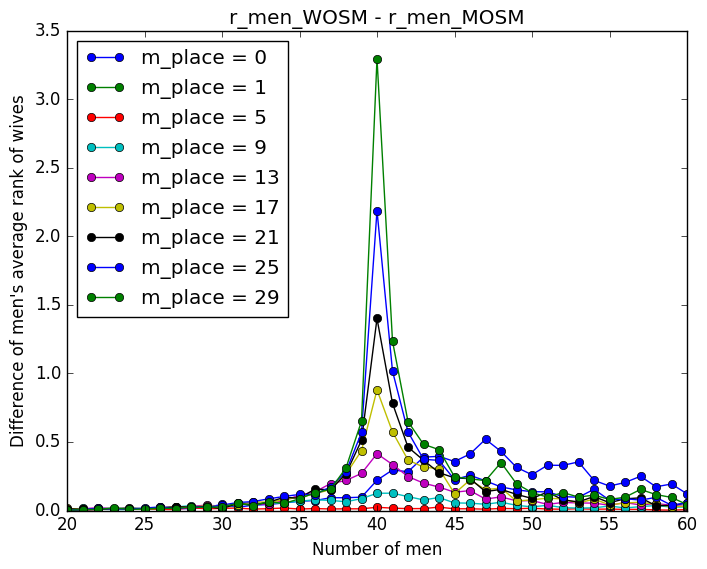

PyObject <matplotlib.legend.Legend object at 0x31f081630>

In [55]:
fig, ax = subplots()
for (k, place) in enumerate(place_range)
    ax[:plot](m_range, [mean(r_mens_diff[:, j, k]) for j in 1:length(m_range)], "-o", label="m_place = $place")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Difference of men's average rank of wives")
#ax[:set_ylim]()
title("r_men_WOSM - r_men_MOSM")
ax[:legend](loc=2)

複数のstable partnersを持つ人の割合をプロットすると,

In [51]:
n = 40
m_range = 20:60
num_loops = 100
place_range = 1:4:29
place_range = insert!(collect(place_range), 1, 0)
pmms = Array(Float64, num_loops, length(m_range), length(place_range))
for (j, m) in enumerate(m_range)
    for (k, place) in enumerate(place_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=place, f_place=m+1)
            pmms[l, j, k] = pmm_fast_revised(m_prefs, f_prefs)
        end
    end
end

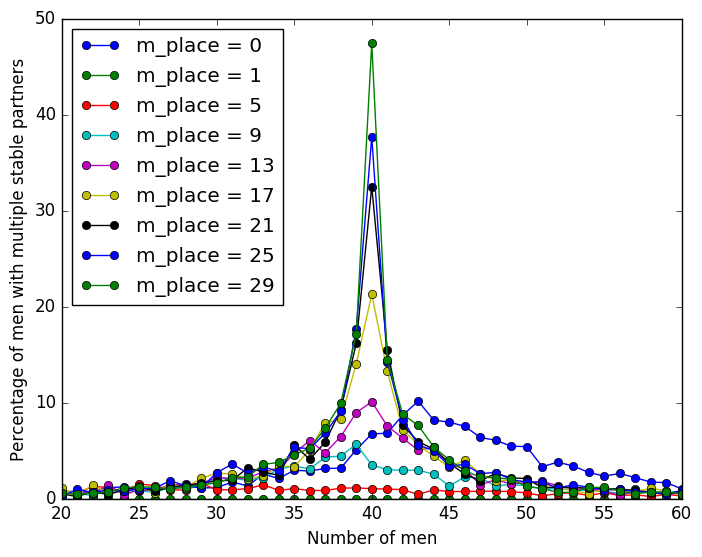

PyObject <matplotlib.legend.Legend object at 0x31f6f6d30>

In [58]:
fig, ax = subplots()
for (k, place) in enumerate(place_range)
    ax[:plot](m_range, [mean(pmms[:, j, k])*100 for j in 1:length(m_range)], "-o", label="m_place = $place")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Percentage of men with multiple stable partners")
#ax[:set_ylim]()
ax[:legend](loc=2)

3) 男性だけstage=1を持ち, 女性皆の選好表には下から数えてstage番目に0(自分とマッチしたい)がある場合(ただしstage = 0 の場合は女性の選好表の0の場所は一様ランダム)

In [36]:
n = 40
m_range = 20:60
num_loops = 100
stage_range = 1:4:21
stage_range = insert!(collect(stage_range), 1, 0)
r_mens = Array(Float64, num_loops, length(m_range), length(stage_range))
for (j, m) in enumerate(m_range)
    for (k, stage) in enumerate(stage_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false, m_stage=1, f_stage=stage)
            m_matched, f_matched = call_match(m_prefs, f_prefs)
            r_mens[l, j, k] = r_men(m_matched, m_prefs)
        end
    end
end

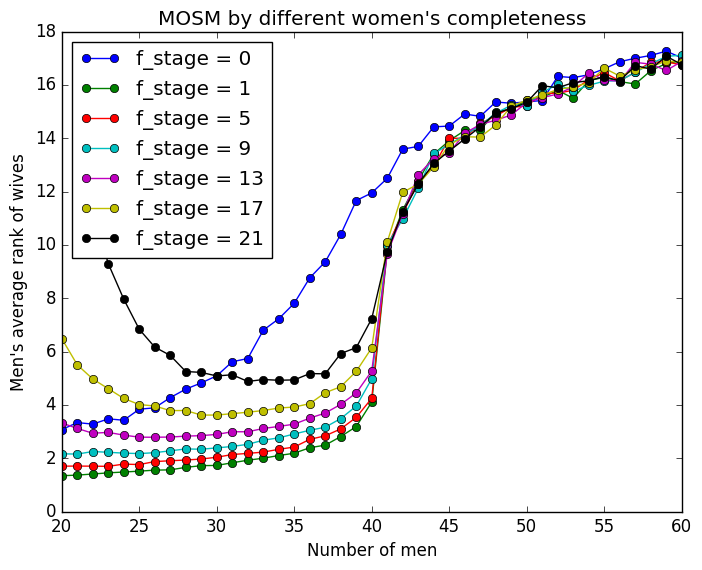

PyObject <matplotlib.legend.Legend object at 0x322a588d0>

In [37]:
fig, ax = subplots()
for (k, stage) in enumerate(stage_range)
    ax[:plot](m_range, [mean(r_mens[:, j, k]) for j in 1:length(m_range)], "-o", label="f_stage = $stage")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
#ax[:set_ylim]()
title("MOSM by different women's completeness")
ax[:legend](loc=2)

3\*) 男性だけ0が最後となるpreference listを持ち, 女性皆の選好表には上から数えてplace番目に0(自分とマッチしたい)がある場合(ただしplace = 0 の場合は女性の選好表の0の場所は一様ランダム)

In [26]:
n = 40
m_range = 20:60
num_loops = 100
place_range = 1:4:21
place_range = insert!(collect(place_range), 1, 0)
r_mens = Array(Float64, num_loops, length(m_range), length(place_range))
for (j, m) in enumerate(m_range)
    for (k, place) in enumerate(place_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=n+1, f_place=place)
            m_matched, f_matched = call_match(m_prefs, f_prefs)
            r_mens[l, j, k] = r_men(m_matched, m_prefs)
        end
    end
end

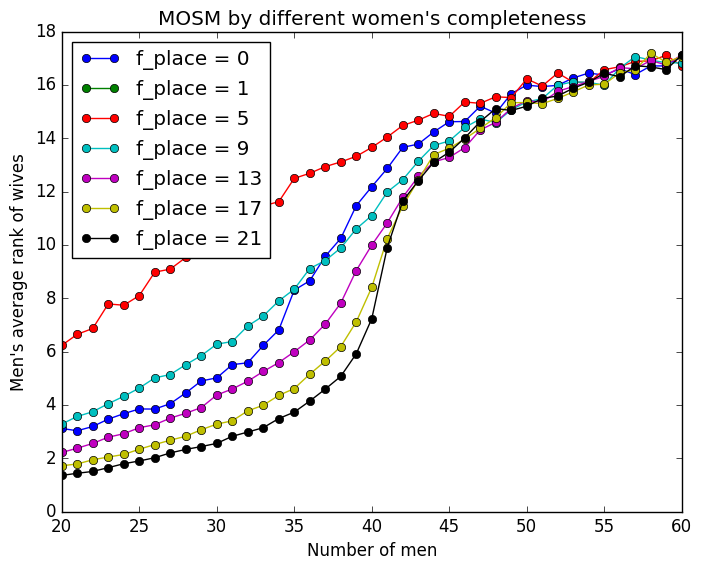

PyObject <matplotlib.legend.Legend object at 0x3770a87b8>

In [27]:
fig, ax = subplots()
for (k, place) in enumerate(place_range)
    ax[:plot](m_range, [mean(r_mens[:, j, k]) for j in 1:length(m_range)], "-o", label="f_place = $place")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
#ax[:set_ylim]()
title("MOSM by different women's completeness")
ax[:legend](loc=2)

In [22]:
n = 40
m_range = 20:60
num_loops = 100
place_range = 1:4:21
place_range = insert!(collect(place_range), 1, 0)
r_mens_diff = Array(Float64, num_loops, length(m_range), length(place_range))
for (j, m) in enumerate(m_range)
    for (k, place) in enumerate(place_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=n+1, f_place=place)
            m_matched, _ = call_match(m_prefs, f_prefs)
            m_matched_wosm, _ = call_match_wosm(m_prefs, f_prefs)
            r_mens_diff[l, j, k] = r_men(m_matched_wosm, m_prefs) - r_men(m_matched, m_prefs)
        end
    end
end

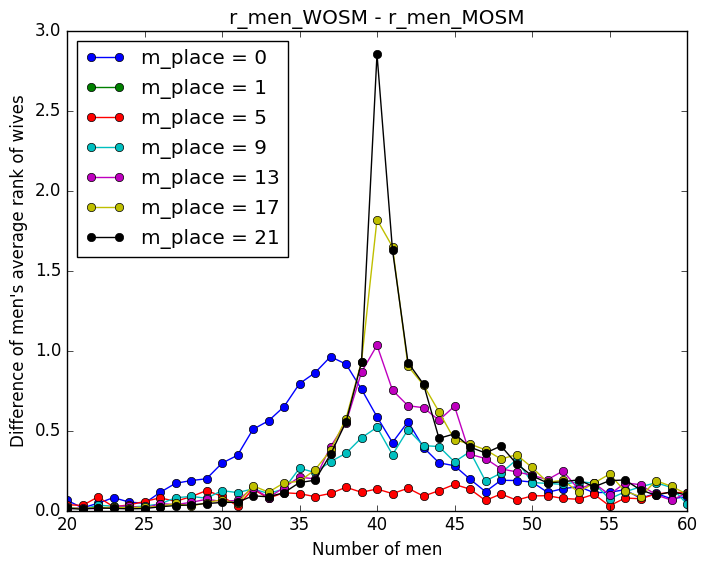

PyObject <matplotlib.legend.Legend object at 0x32ba75400>

In [23]:
fig, ax = subplots()
for (k, place) in enumerate(place_range)
    ax[:plot](m_range, [mean(r_mens_diff[:, j, k]) for j in 1:length(m_range)], "-o", label="m_place = $place")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Difference of men's average rank of wives")
#ax[:set_ylim]()
title("r_men_WOSM - r_men_MOSM")
ax[:legend](loc=2)

4) 男性,女性皆の選好表には下から数えてstage番目に0(自分とマッチしたい)がある場合

In [3]:
n = 40
m_range = 20:60
num_loops = 100
stage_range = 1:4:21
r_mens = Array(Float64, num_loops, length(m_range), length(stage_range))
for (j, m) in enumerate(m_range)
    for (k, stage) in enumerate(stage_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data(m, n, complete=false, m_stage=stage, f_stage=stage)
            m_matched, f_matched = call_match(m_prefs, f_prefs)
            r_mens[l, j, k] = r_men(m_matched, m_prefs)
        end
    end
end

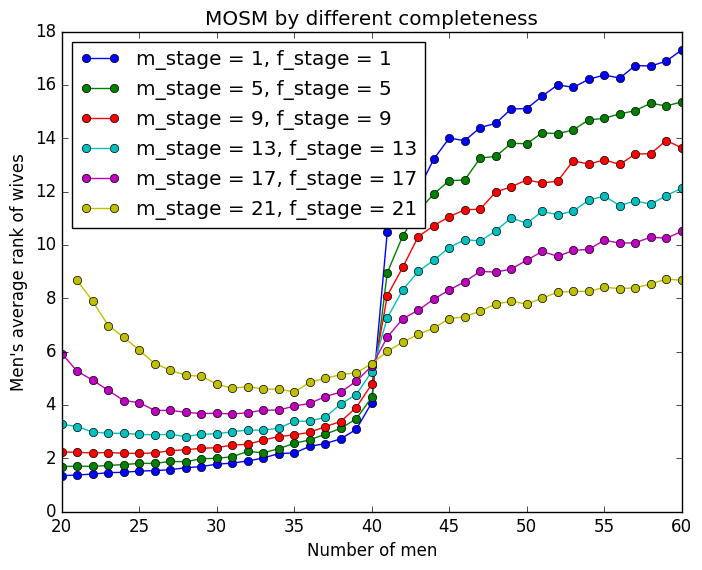

PyObject <matplotlib.legend.Legend object at 0x31f3bfc50>

In [4]:
fig, ax = subplots()
for (k, stage) in enumerate(stage_range)
    ax[:plot](m_range, [mean(r_mens[:, j, k]) for j in 1:length(m_range)], "-o", label="m_stage = $stage, f_stage = $stage")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
#ax[:set_ylim]()
title("MOSM by different completeness")
ax[:legend](loc=2)

4\*) 男性,女性皆の選好表には上から数えてplace番目に0(自分とマッチしたい)がある場合

In [28]:
n = 40
m_range = 20:60
num_loops = 100
place_range = 1:4:21
r_mens = Array(Float64, num_loops, length(m_range), length(place_range))
for (j, m) in enumerate(m_range)
    for (k, place) in enumerate(place_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=place, f_place=place)
            m_matched, f_matched = call_match(m_prefs, f_prefs)
            r_mens[l, j, k] = r_men(m_matched, m_prefs)
        end
    end
end

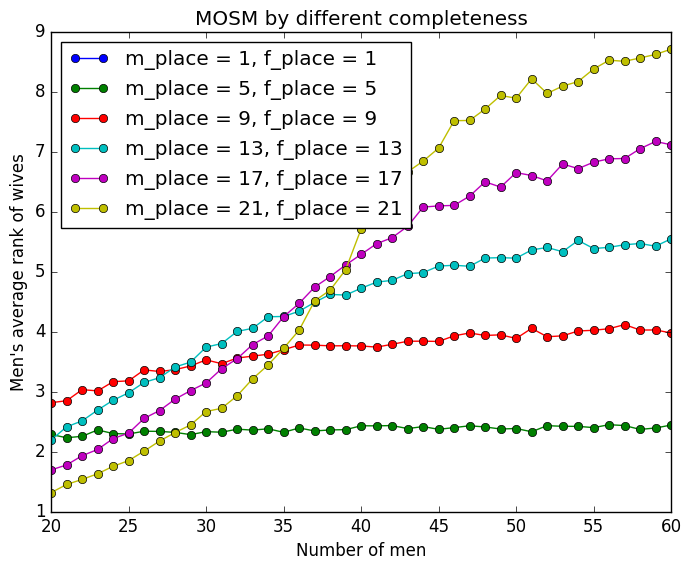

PyObject <matplotlib.legend.Legend object at 0x32588ce48>

In [29]:
fig, ax = subplots()
for (k, place) in enumerate(place_range)
    ax[:plot](m_range, [mean(r_mens[:, j, k]) for j in 1:length(m_range)], "-o", label="m_place = $place, f_place = $place")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
#ax[:set_ylim]()
title("MOSM by different completeness")
ax[:legend](loc=2)

In [43]:
n = 40
m_range = 20:60
num_loops = 100
place_range = 1:4:21
r_mens_diff = Array(Float64, num_loops, length(m_range), length(place_range))
for (j, m) in enumerate(m_range)
    for (k, place) in enumerate(place_range)
        for l in 1:num_loops
            m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=place, f_place=place)
            m_matched, _ = call_match(m_prefs, f_prefs)
            m_matched_wosm, _ = call_match_wosm(m_prefs, f_prefs)
            r_mens_diff[l, j, k] = r_men(m_matched_wosm, m_prefs) - r_men(m_matched, m_prefs)
        end
    end
end

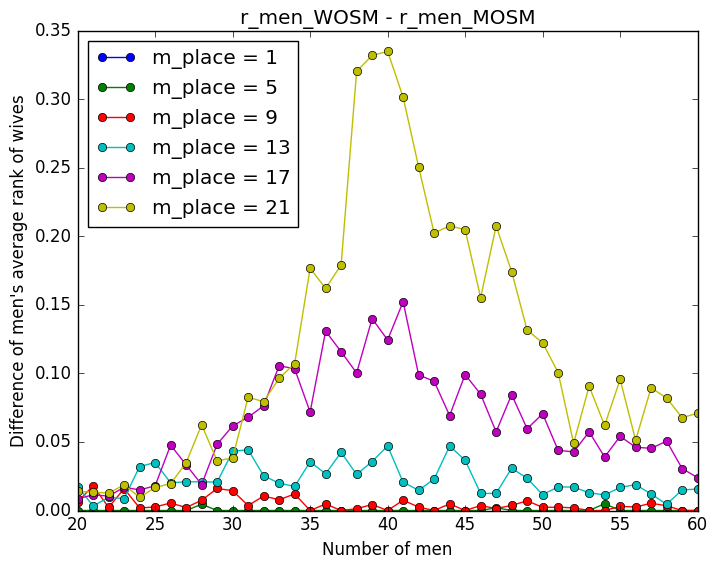

PyObject <matplotlib.legend.Legend object at 0x32c043780>

In [29]:
fig, ax = subplots()
for (k, place) in enumerate(place_range)
    ax[:plot](m_range, [mean(r_mens_diff[:, j, k]) for j in 1:length(m_range)], "-o", label="m_place = $place")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Difference of men's average rank of wives")
#ax[:set_ylim]()
title("r_men_WOSM - r_men_MOSM")
ax[:legend](loc=2)

男性と女性の人数が等しい(40人)のとき, placeの違いでmen's average ranks of wives under MOSM とmen's average rank of wives under WOSMはどれほど違うか.
ただしplace = 0は選好表内の0(自分とマッチしたい)が一様ランダムな場所にあることを示す.
女性は0が最後に来るものとする.

In [44]:
n = 40
m = 40
num_loops = 1000
place_range = 0:1:20
r_mens_diff = Array(Float64, num_loops, length(place_range))
r_womens_diff = Array(Float64, num_loops, length(place_range))
for (k, place) in enumerate(place_range)
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data_revised(m, n, complete=false, m_place=place, f_place=m+1)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        m_matched_wosm, f_matched_wosm = call_match_wosm(m_prefs, f_prefs)
        r_mens_diff[l, k] = r_men(m_matched_wosm, m_prefs) - r_men(m_matched, m_prefs)
        r_womens_diff[l, k] = - r_women(f_matched_wosm, f_prefs) + r_women(f_matched, f_prefs)
    end
end

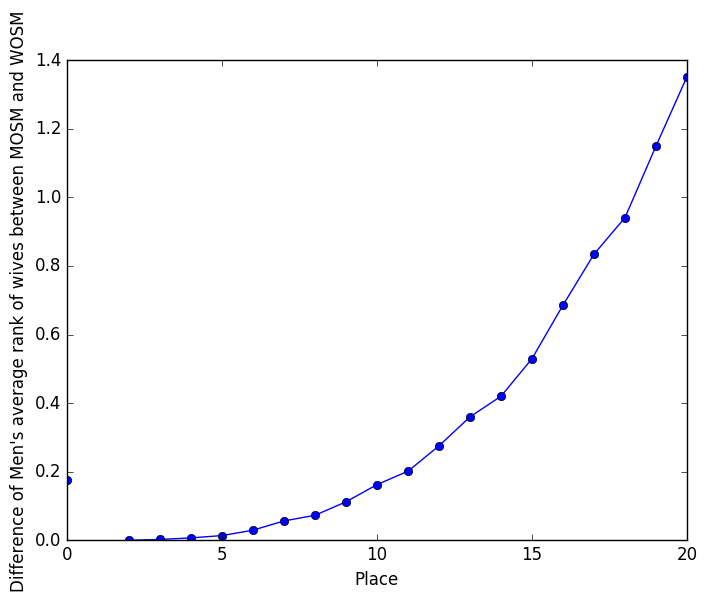

In [45]:
fig, ax = subplots()
ax[:plot](place_range, [mean(r_mens_diff[:, k]) for k in 1:length(place_range)], "-o")

ax[:set_xlabel]("Place")
ax[:set_ylabel]("Difference of Men's average rank of wives between MOSM and WOSM")
ax[:legend]()

In [ ]:
fig, ax = subplots()
ax[:plot](place_range, [mean(r_womens_diff[:, k]) for k in 1:length(place_range)], "-o")

ax[:set_xlabel]("Place")
ax[:set_ylabel]("Difference of Women's average rank of wives between MOSM and WOSM")
ax[:legend]()

**Theorem 2.**

任意の$k = k(n)\geq 1$ に対し, nで添字付けられたマッチングマーケットの列を考える(ただしマッチングマーケットnは$n$人の男性, $n + k$人の女性を持つ.
任意の安定マッチング$\mu$に対し, 以下の起きる確率が1に収束する.
$$
R_{MEN} (\mu)  \leq (1 + \epsilon)\biggl(\frac{n+k}{n}\biggr)\log \biggl(\frac{n+k}{k}\biggr)
$$
$$
R_{WOMEN} (\mu)  \geq n / \biggl[(1 + \epsilon)\biggl(\frac{n+k}{n}\biggr)\log \biggl(\frac{n+k}{k}\biggr)\biggr]
$$

一方, men’s average rank of wives under RSDはほぼ

$$
\biggl(\frac{n+k}{n}\biggr)\log\biggl(\frac{n+k}{k}\biggr)
$$

となる. 

したがって, 殆どの安定マッチングにおいて, the men’s average rank of wivesはRSDのもとでのそれにほぼ等しくなる.　women’s average rank of husbands under any stable matchingはランダムにマッチするよりは良い. したがって,　数の少ないほうが数の多い方を"選ぶ"と言うことができる.

nが十分大きいとき, 女性の数が男性の数よりも多いなら the men’s average rank of wivesはRSDのもとでのそれにほぼ等しくなると解釈できる.

**Corollary 2.2.** Consider a sequence of random matching markets with $n$ men and $n + 1$ women. Fix any $\epsilon > 0$. With high probability, in every stable matching, the men’s average rank of wives is no more than $(1 + \epsilon) \log n$, the women’s average rank of husbands is at least $\frac{n}{(1 + \epsilon) \log n}$, and the fractions of men and women who have multiple stable partners are each no more than $\epsilon$.

**Corollary 2.3.** For $\lambda > 0$, consider a sequence of random matching markets with $|\mathcal{M}| = n,|\mathcal{W}|=(1+\lambda)n$.
Fix any $\epsilon>0$. Define the constant $\kappa = (1+\epsilon)(1+ \lambda)\log(1+1/\lambda)$. 
We have that with high probability, in every stable matching, the men’s average rank of wives is at most $\kappa$, the women’s average rank of husbands is at least $n/(1 +\kappa)$, and the fractions of men and women who have multiple stable partners are each no more than $\epsilon$.

In [55]:
n = 40
r_mens = []
r_mens_wosm = []
r_mens_rsd = []
m_range = 20:60
num_loops = 100
for m in m_range
    rs = []
    rs_wosm = []
    rs_rsd = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n, complete=true)
        m_matched, _ = call_match(m_prefs, f_prefs)
        m_matched_wosm, _ = call_match_wosm(m_prefs, f_prefs)
        m_matched_rsd, _ = rsd(m, n, m_prefs)
        push!(rs, r_men(m_matched, m_prefs))
        push!(rs_wosm, r_men(m_matched_wosm, m_prefs))
        push!(rs_rsd, r_men(m_matched_rsd, m_prefs))
    end
    push!(r_mens, mean(rs))
    push!(r_mens_wosm, mean(rs_wosm))
    push!(r_mens_rsd, mean(rs_rsd))
end

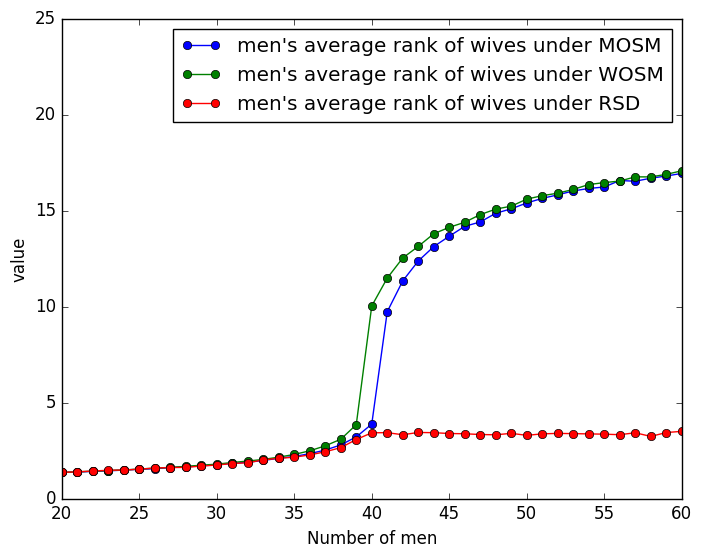

PyObject <matplotlib.legend.Legend object at 0x32cc9cb38>

In [62]:
fig, ax = subplots()
ax[:plot](m_range, r_mens, "-o", label="men's average rank of wives under MOSM")
ax[:plot](m_range, r_mens_wosm, "-o", label="men's average rank of wives under WOSM")
ax[:plot](m_range, r_mens_rsd, "-o", label="men's average rank of wives under RSD")
ax[:set_ylim](0, 25)
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("value")
ax[:legend]()

In [37]:
n = 40

m_range = 20:60
num_loops = 10000

r_mens = Array(Float64, num_loops, length(m_range))
r_mens_wosm = Array(Float64, num_loops, length(m_range))
r_mens_rsd = Array(Float64, num_loops, length(m_range))

for (j, m) in enumerate(m_range)
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match(m_prefs, f_prefs)
        r_mens[l, j] = r_men(m_matched, m_prefs)
    end
end

for (j, m) in enumerate(m_range)
    rs = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = call_match_wosm(m_prefs, f_prefs)
        r_mens_wosm[l, j] = r_men(m_matched, m_prefs)
    end
end

for (j, m) in enumerate(m_range)
    rs = []
    for l in 1:num_loops
        m_prefs, f_prefs = generate_random_preference_data(m, n)
        m_matched, f_matched = rsd(m, n, m_prefs)
        r_mens_rsd[l, j] = r_men(m_matched, m_prefs)
    end
end

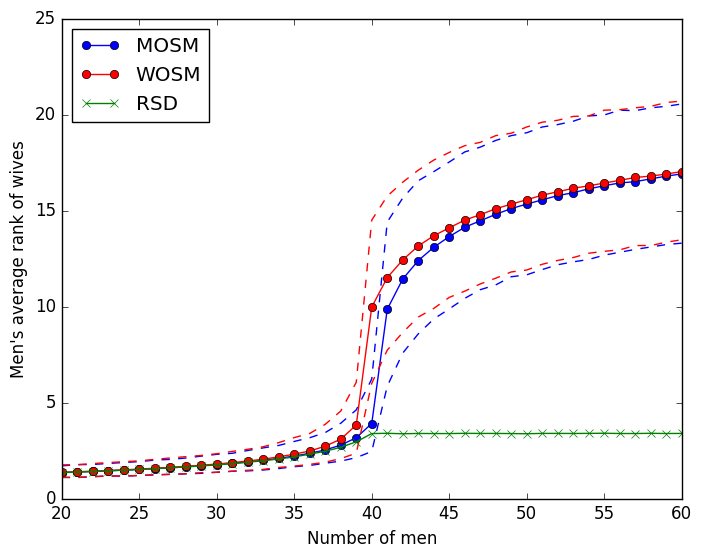

PyObject <matplotlib.legend.Legend object at 0x3227176d8>

In [38]:
fig, ax = subplots()
ax[:plot](m_range, [mean(r_mens[:, j]) for j in 1:size(r_mens, 2)], "-o", color="b", label="MOSM")
ax[:plot](m_range, [quantile(r_mens[:, j], 2.5/100) for j in 1:size(r_mens, 2)], "--", color="b")
ax[:plot](m_range, [quantile(r_mens[:, j], 97.5/100) for j in 1:size(r_mens, 2)], "--", color="b")
ax[:plot](m_range, [mean(r_mens_wosm[:, j]) for j in 1:size(r_mens_wosm, 2)], "-o", color="r", label="WOSM")
ax[:plot](m_range, [quantile(r_mens_wosm[:, j], 2.5/100) for j in 1:size(r_mens, 2)], "--", color="r")
ax[:plot](m_range, [quantile(r_mens_wosm[:, j], 97.5/100) for j in 1:size(r_mens, 2)], "--", color="r")
ax[:plot](m_range, [mean(r_mens_rsd[:, j]) for j in 1:size(r_mens_rsd, 2)], "-x", color="g", label="RSD")
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=2)

点線は2.5%, 97.5%分位点を表す.

男性の方が少ないとき, 男性は自分のより好む相手の一人とマッチする.
男性の方が多いとき, 男性はマッチしていないか, ランダムなマッチよりはましな相手とマッチする.

## Intuition for the results, new matching mechanism

不均衡なマッチングでコアが小さい直感的な理由.

女性の数が多いマッチングにおいて, Rural Hospital Theorem(Roth, 1986)によると, すべての安定マッチングにおいて同じ女性$\bar w$がマッチできない.
したがって, すべての安定マッチングは$\bar w$を除いたマッチングの安定マッチングに帰着でき, またどの男性も自分のマッチする女性を$\bar w$よりも好むという条件のもとで安定マッチングに$\bar w$を加えても安定なままである.
しかしながら,この条件はめったにおきないので, 不均衡なマッチングマーケットでのコアは小さくなる.

## Size of the core under correlated preferences


選好でのcorrelationがコアの大きさに及ぼす影響を調べる. (結局, correlationがあるほどコアは小さくなる)

Random Utility Modelを用いる. つまり, 

全員が２つのcharacteristics, $x^A$ and $x^D$をもち, $i$が$j$とマッチする事による効用は, 

$$
u_i(j) = \beta x^A_j - \gamma(x^D_i - x^D_j )^2 + \epsilon_{ij}
$$

によって与えられる. ただし, 

$\epsilon_{ij}$ はペア$(i, j)$に対するidiosyncratic termであり, 独立に標準ロジスティック分布に従う. $x^A_i$ は すべての人に望ましいvertical qualityとし,  独立に$U[0,1]$に従う. $x^D_i$ は場所とし, 独立に$U[0,1]$に従う. 係数$\gamma$は人々の距離に対する選好を決定する. $\beta, \gamma$は男女共通の値とする.

$\beta = \gamma = 0$のとき, 選好は独立に一様にランダムに選ばれる. $\gamma$を固定したとき, $\beta$が増えるにつれ, 選好はよりcorrelatedとなる. $\beta \rightarrow \infty$ですべての男性が女性に対して同じ選好をもつ.(逆も同様)

m = n = 20のとき

In [4]:
m = 20
n = 20
gamma_range = -20:5:20
beta_range = 0:2:20
loops = 100
pmms3d = Array(Float64, loops, length(gamma_range), length(beta_range))

for (i, gamma) in enumerate(gamma_range)
    for (j, beta) in enumerate(beta_range)
        for l in 1:loops
            m_x_as, f_x_as, m_x_ds, f_x_ds = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n)
            m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds)
            pmms3d[l, i, j] = pmm_fast_revised(m_prefs, f_prefs)
        end
    end
end

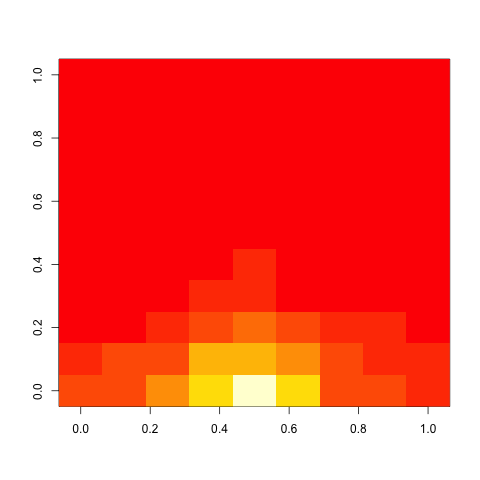

RCall.RObject{RCall.NilSxp}
NULL


In [5]:
pmms3drev = Array(Float64, length(gamma_range), length(beta_range))

for i in 1:length(gamma_range)
    for j in 1:length(beta_range)
        pmms3drev[i, j] = mean(pmms3d[:, i, j]) * 100
    end
end
        
R"image($pmms3drev)"


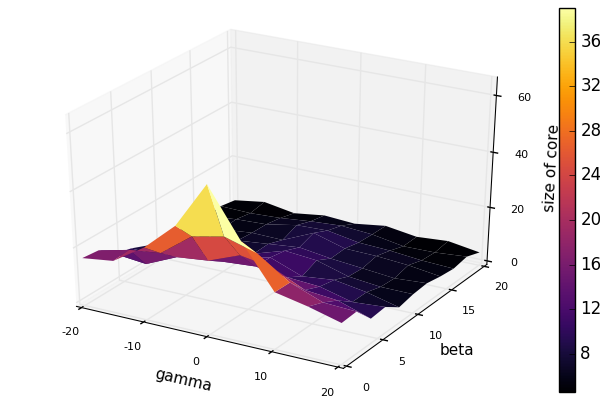

In [16]:
surface(gamma_range, beta_range, pmms3drev', xlabel="gamma", ylabel="beta", zlabel="size of core", zlim=(0, 65))#, xlabel="x", ylabel="y", zlabel="z")

m = 21, n = 20のとき

In [17]:
m = 21
n = 20
gamma_range = -20:5:20
beta_range = 0:2:20
loops = 100
pmms3d = Array(Float64, loops, length(gamma_range), length(beta_range))

for (i, gamma) in enumerate(gamma_range)
    for (j, beta) in enumerate(beta_range)
        for l in 1:loops
            m_x_as, f_x_as, m_x_ds, f_x_ds = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n)
            m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds)
            pmms3d[l, i, j] = pmm_fast_revised(m_prefs, f_prefs)
        end
    end
end


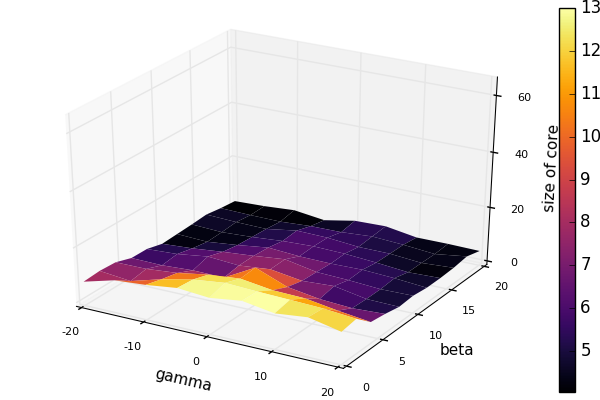

In [18]:
pmms3drev = Array(Float64, length(gamma_range), length(beta_range))
for i in 1:length(gamma_range)
    for j in 1:length(beta_range)
        pmms3drev[i, j] = mean(pmms3d[:, i, j]) * 100
    end
end
surface(gamma_range, beta_range, pmms3drev', xlabel="gamma", ylabel="beta", zlabel="size of core", zlim=(0, 65))#, xlabel="x", ylabel="y", zlabel="z")

m = 30, n = 20のとき

In [19]:
m = 30
n = 20
gamma_range = -20:5:20
beta_range = 0:2:20
loops = 100
pmms3d = Array(Float64, loops, length(gamma_range), length(beta_range))

for (i, gamma) in enumerate(gamma_range)
    for (j, beta) in enumerate(beta_range)
        for l in 1:loops
            m_x_as, f_x_as, m_x_ds, f_x_ds = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n)
            m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds)
            pmms3d[l, i, j] = pmm_fast_revised(m_prefs, f_prefs)
        end
    end
end


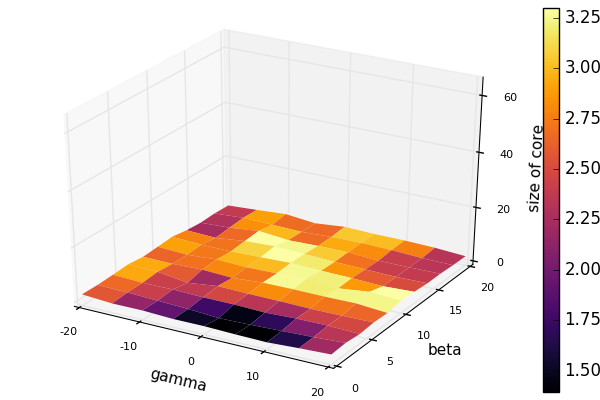

In [20]:
pmms3drev = Array(Float64, length(gamma_range), length(beta_range))
for i in 1:length(gamma_range)
    for j in 1:length(beta_range)
        pmms3drev[i, j] = mean(pmms3d[:, i, j]) * 100
    end
end
surface(gamma_range, beta_range, pmms3drev', xlabel="gamma", ylabel="beta", zlabel="size of core", zlim=(0, 65))#, xlabel="x", ylabel="y", zlabel="z")

様々な係数の値のもとでのコアのサイズがプロットされている. 
結果として, より一般的な選好の分布によりコアが小さくなることがわかる.

In [3]:
m_range = 30:2:50
n = 40
gamma = 0
beta_range = [0, 1, 2, 5, 10, 100]
loops = 100
r_mens = Array(Float64, loops, length(m_range), length(beta_range))
for (i, m) in enumerate(m_range)
    for (j, beta) in enumerate(beta_range)
        for l in 1:loops
            m_x_as, f_x_as, m_x_ds, f_x_ds = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n)
            m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds)
            m_matched, _ = call_match(m_prefs, f_prefs)
            r_mens[l, i, j] = r_men(m_matched, m_prefs)
        end
    end
end

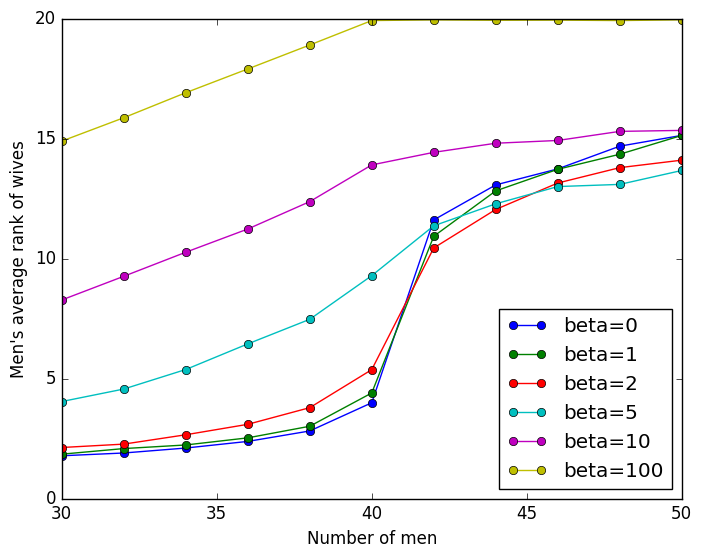

PyObject <matplotlib.legend.Legend object at 0x31defec88>

In [13]:
fig, ax = subplots()
for j in 1:length(beta_range)
    ax[:plot](m_range, [mean(r_mens[:, i, j]) for i in 1:length(m_range)], "-o", label="beta=$(beta_range[j])")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=4)

In [15]:
m_range = 30:2:50
n = 40
beta = 0
gamma_range = [0, 1, 2, 5, 10, 100, 1000]

loops = 100
r_mens = Array(Float64, loops, length(m_range), length(gamma_range))
for (i, m) in enumerate(m_range)
    for (j, gamma) in enumerate(gamma_range)
        for l in 1:loops
            m_x_as, f_x_as, m_x_ds, f_x_ds = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n)
            m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds)
            m_matched, _ = call_match(m_prefs, f_prefs)
            r_mens[l, i, j] = r_men(m_matched, m_prefs)
        end
    end
end

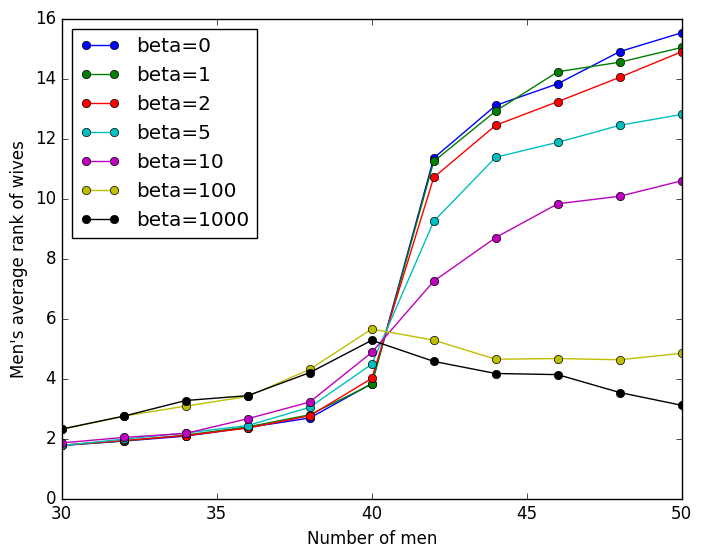

PyObject <matplotlib.legend.Legend object at 0x31f239ac8>

In [19]:
fig, ax = subplots()
for j in 1:length(gamma_range)
    ax[:plot](m_range, [mean(r_mens[:, i, j]) for i in 1:length(m_range)], "-o", label="beta=$(gamma_range[j])")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=2)

In [22]:
m_range = 30:2:50
n = 40
param_range = [0, 1, 2, 5, 10, 100]

loops = 100
r_mens = Array(Float64, loops, length(m_range), length(param_range))
for (i, m) in enumerate(m_range)
    for (j, param) in enumerate(param_range)
        beta = gamma = param
        for l in 1:loops
            m_x_as, f_x_as, m_x_ds, f_x_ds = set_x_as(m), set_x_as(n), set_x_ds(m), set_x_ds(n)
            m_prefs, f_prefs = get_mn_prefs_by_utility(m, n, beta, gamma, m_x_as, f_x_as, m_x_ds, f_x_ds)
            m_matched, _ = call_match(m_prefs, f_prefs)
            r_mens[l, i, j] = r_men(m_matched, m_prefs)
        end
    end
end

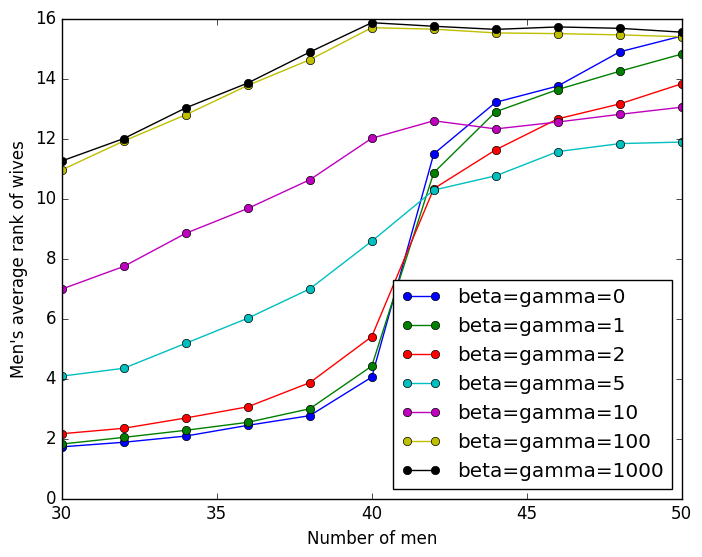

PyObject <matplotlib.legend.Legend object at 0x31f664630>

In [24]:
fig, ax = subplots()
for j in 1:length(param_range)
    ax[:plot](m_range, [mean(r_mens[:, i, j]) for i in 1:length(m_range)], "-o", label="beta=gamma=$(param_range[j])")
end
ax[:set_xlabel]("Number of men")
ax[:set_ylabel]("Men's average rank of wives")
ax[:legend](loc=4)

## 参考

I. Ashlagi, Y. Kanoria, and J. D. Leshno (2015). "[Unbalanced Random Matching Markets: The Stark Effect of Competition.]("http://web.stanford.edu/~iashlagi/papers/UnbalancedMatchingAKL.pdf")"

Rパッケージ [matchingMarkets]("https://github.com/thiloklein/matchingMarkets")